In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
pd.set_option('display.max_columns',None)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
df.shape

(908, 25)

In [4]:
df.columns.to_list()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_data_source',
 'estimated_generation_gwh']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [6]:
df['country'].value_counts()

IND    908
Name: country, dtype: int64

Since there is only one Country, we can drop the columns.

In [7]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [8]:
df['name'].value_counts()

HAMPI                                 1
KOLAGHAT                              1
BELLARY HOTHUR                        1
GODAVARI GT                           1
KODAYAR-I&II                          1
                                     ..
GOINDWAL SAHIB TPP                    1
SONE EAST CANAL                       1
BHANDARA STEEL MILL                   1
Askandra - Khaya Solar Power Plant    1
KOLHAPUR HEMARUS                      1
Name: name, Length: 908, dtype: int64

The name column has unique for values for every plant, let us drop it.

Let us drop the unnecessary columns.

In [9]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [10]:
df['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [11]:
df['other_fuel3'].value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [12]:
df['gppd_idnr'].value_counts()

WRI1026138    1
IND0000384    1
IND0000253    1
WRI1026764    1
WRI1026150    1
             ..
IND0000012    1
IND0000357    1
IND0000334    1
IND0000272    1
WRI1019982    1
Name: gppd_idnr, Length: 908, dtype: int64

The column 'gppd_idnr' has ID's of the power plant, so let us drop it.

In [13]:
df.drop(columns=['name','gppd_idnr','other_fuel2','other_fuel3','owner','url','wepp_id','year_of_capacity_data',
                 'generation_data_source','estimated_generation_gwh'],axis=1,inplace=True)

In [14]:
df.shape

(908, 13)

We have dropped all the unnecessary columns

# Missing Values

In [15]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

We can see that most of the columns have Null values in them.

In [16]:
df.skew()

capacity_mw            3.193257
latitude              -0.143622
longitude              1.100942
commissioning_year    -1.056132
generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
dtype: float64

1. The columns longitude, commissioning year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 and generation_gwh_2017 are numerical type and have many outliers and lot of skewness,so let's replace the Null values in these columns with it's median.
2. Latitude doesn't have much skew, so let us fill the null values with it's mean.

In [17]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2013"] = df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())

In [18]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            709
commissioning_year       0
source                   0
geolocation_source      19
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

In [19]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

Let us fill the Null values of the column 'other_fuel1' with Oil.

In [20]:
df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1']).mode()[0]

In [21]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

Let us fill the column 'geolocation_source' with the value 'WRI'

In [22]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source']).mode()[0]

In [23]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

We have now filed all the null values.

In [24]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

Let us calculate how old the Power plants are from the column commissioning_year

In [25]:
df['plant_age'] = 2021 - df['commissioning_year'] 
df.drop(columns=['commissioning_year'],axis=1,inplace=True)

In [26]:
df.columns.to_list()

['capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'source',
 'geolocation_source',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'plant_age']

In [27]:
df['plant_age']

0      10.0
1      21.0
2      21.0
3      17.0
4       6.0
       ... 
903     5.0
904    21.0
905    21.0
906    21.0
907    21.0
Name: plant_age, Length: 908, dtype: float64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   other_fuel1          908 non-null    object 
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
 12  plant_age            908 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.3+ KB


In [29]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,22.816079
std,580.221767,6.088110,4.783873,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,13.085938
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,16.837500,17.057825,74.390250,797.063475,805.760000,701.027250,716.728350,807.601700,18.000000
50%,60.000000,21.278850,76.719250,797.063475,805.760000,701.027250,716.728350,807.601700,21.000000
75%,388.125000,25.183775,79.211600,797.063475,805.760000,701.027250,716.728350,807.601700,24.000000
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,94.000000


# Univariate Analysis

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64


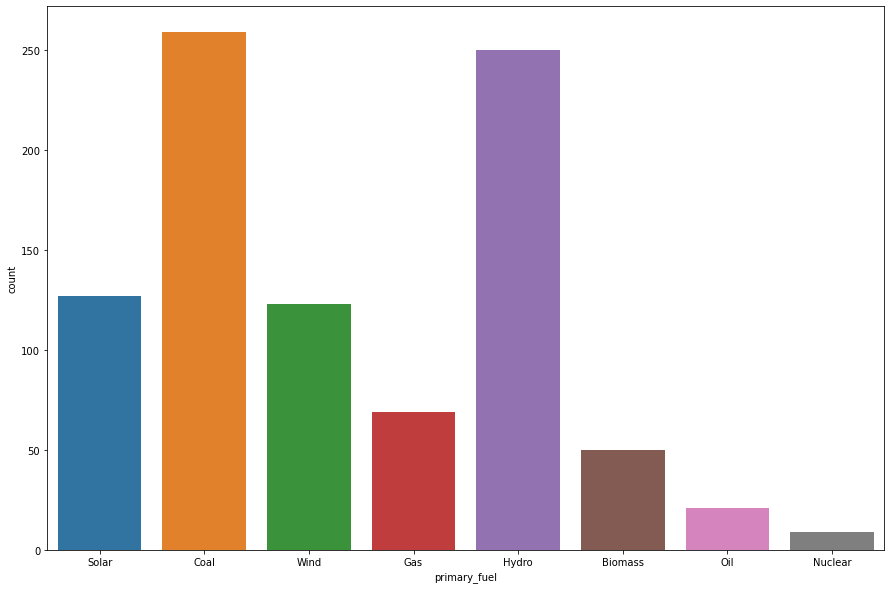

In [30]:
print(df['primary_fuel'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(df['primary_fuel'])
plt.show()

From the above visualization we can observe the following:
1. Most of the power plants are functioned using Coal and Hydro power
2. The number of solar and wind power plants are almost equal in number
3. Nuclear power plants used for power generation are the least.

WRI    908
Name: geolocation_source, dtype: int64


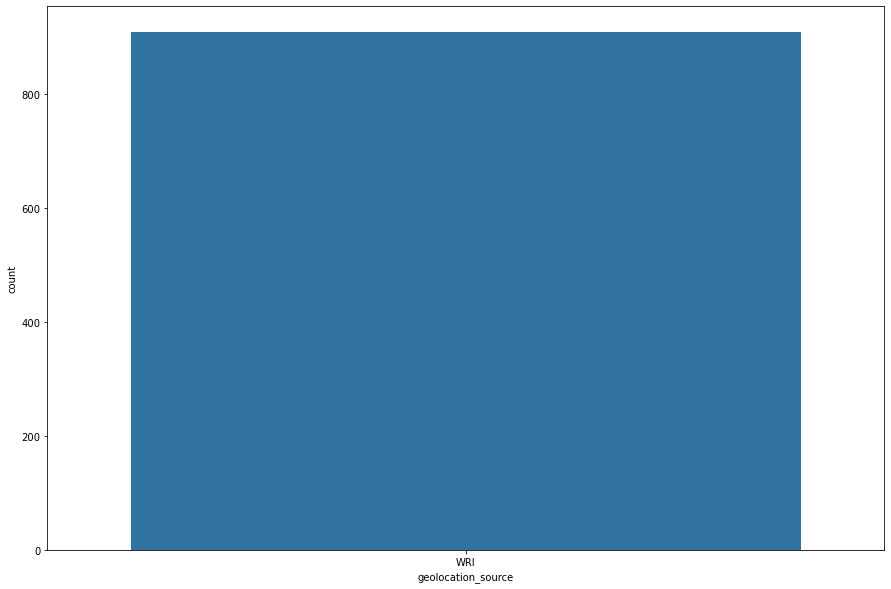

In [31]:
print(df['geolocation_source'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(df['geolocation_source'])
plt.show()

As we can see from the above graph, World Resources Institute(WRI) has highest counts which means WRI gives the more geological information compare to other two sources.

# Checking Skewness

In [32]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,22.816079
std,580.221767,6.088110,4.783873,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,13.085938
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,16.837500,17.057825,74.390250,797.063475,805.760000,701.027250,716.728350,807.601700,18.000000
50%,60.000000,21.278850,76.719250,797.063475,805.760000,701.027250,716.728350,807.601700,21.000000
75%,388.125000,25.183775,79.211600,797.063475,805.760000,701.027250,716.728350,807.601700,24.000000
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,94.000000


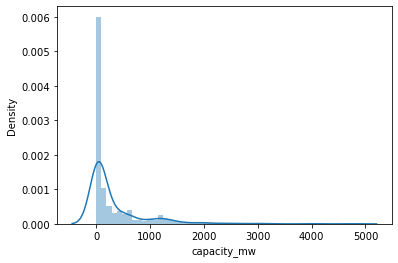

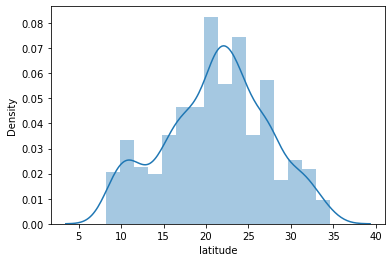

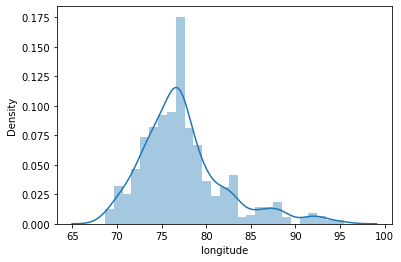

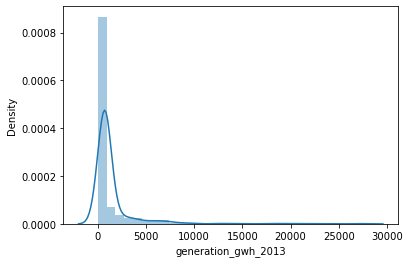

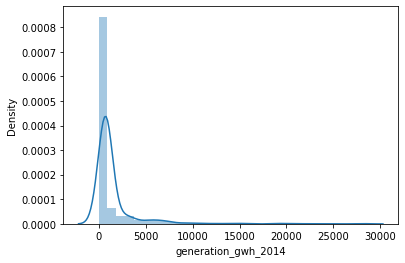

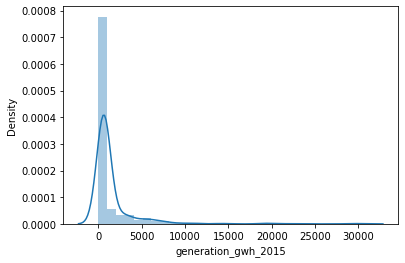

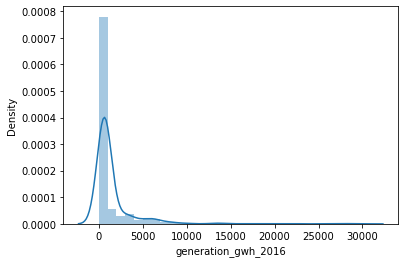

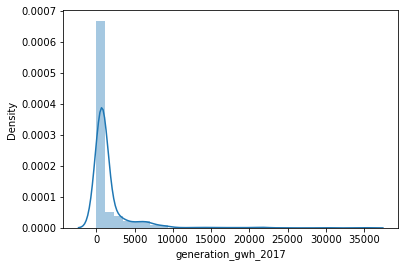

In [33]:
columns = ['capacity_mw','latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015',
           'generation_gwh_2016','generation_gwh_2017']
for i in columns:
    sns.distplot(df[i])
    plt.show()

As we can see data is not normally distributed

# Bivariate Analysis

<AxesSubplot:xlabel='plant_age', ylabel='capacity_mw'>

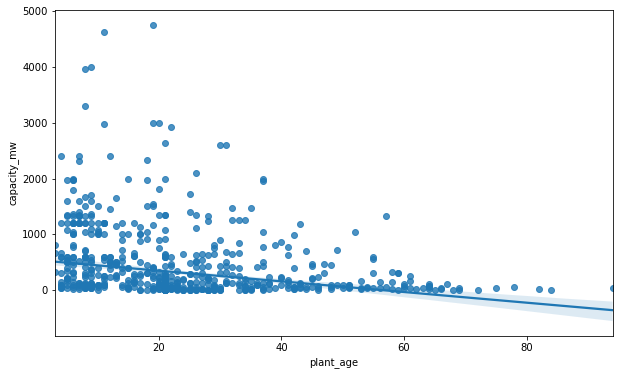

In [34]:
plt.figure(figsize=[10,6])
sns.regplot(df['plant_age'],df['capacity_mw'])

We can see that there is a negative relationship between start_year and capacity_mw

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

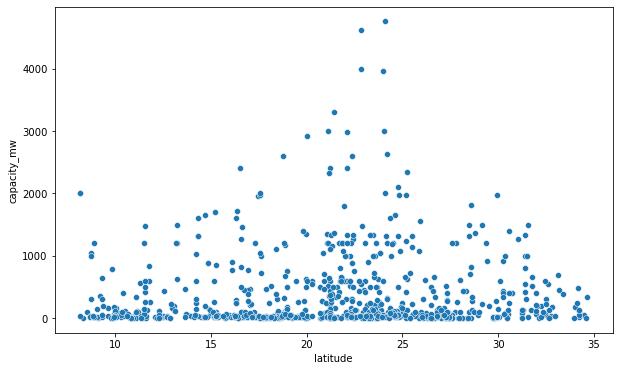

In [35]:
plt.figure(figsize=[10,6])
sns.scatterplot(df['latitude'],df["capacity_mw"])

The plot shows that there is no linear relation between latitude and capacity of the power plant.

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

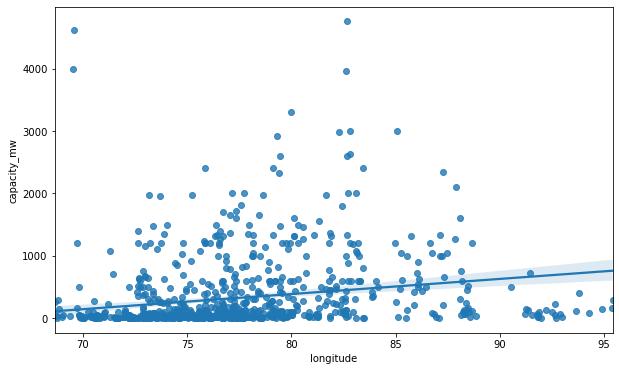

In [36]:
plt.figure(figsize=[10,6])
sns.regplot(df['longitude'],df["capacity_mw"])

The relationship between longitude and capacity_mw is not strong

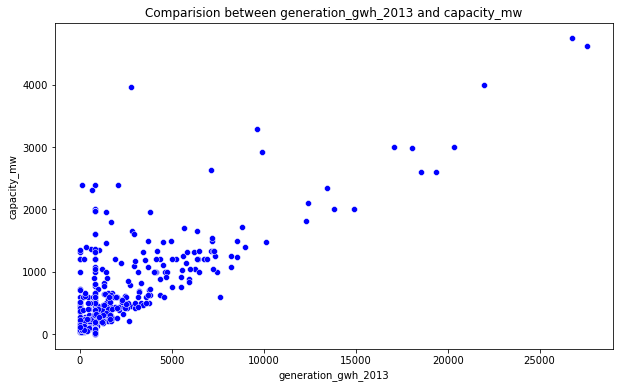

In [37]:
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2013 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2013", y = "capacity_mw", data = df,color="b")
plt.show()

We can see a linear relationship between the Generation_gwh_2013 and capacity_mw. Here the electricity generation reported for the year 2013 has capacity above 10,000W. As the generation growth increases, the capacity of plant also increases.

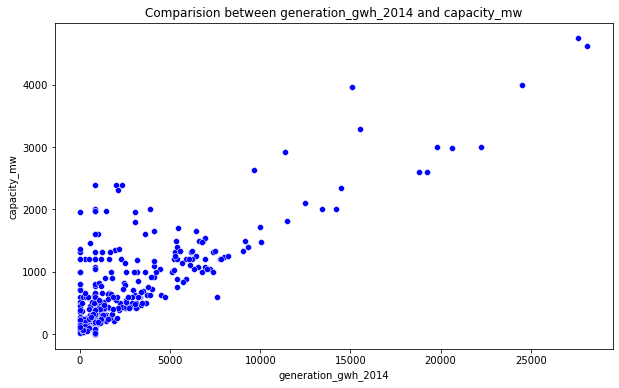

In [38]:
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2014 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = df,color="b")
plt.show()

We can see a linear relationship between the Generartion_gwh_2014 and capacity_mw. Here the electricity generation reported for the year 2013 has capacity above 10,000W. As the generation growth increases, the capacity of plant also increases.

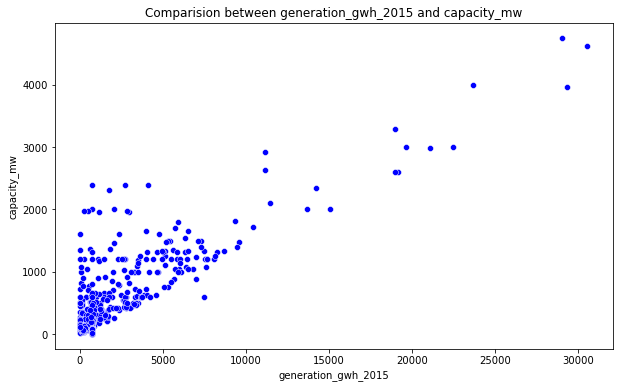

In [39]:
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2015 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2015", y = "capacity_mw", data = df,color="b")
plt.show()

We can see a linear relationship between the Generartion_gwh_2015 and capacity_mw. Here the electricity generation reported for the year 2015 has capacity above 10,000W. As the generation growth increases, the capacity of plant also increases.

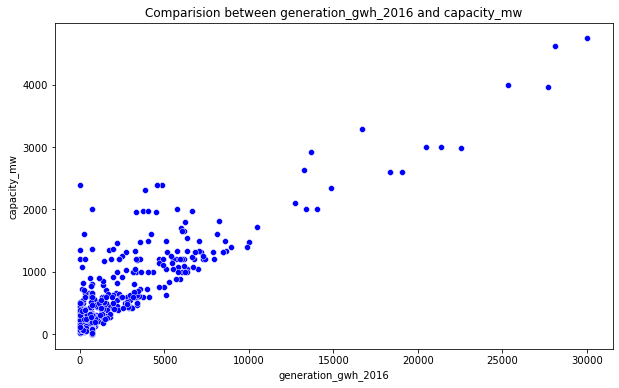

In [40]:
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2016 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2016", y = "capacity_mw", data = df,color="b")
plt.show()

We can see a linear relationship between the Generartion_gwh_2015 and capacity_mw. Here the electricity generation reported for the year 2016 has capacity above 10,000W. As the generation growth increases, the capacity of plant also increases.

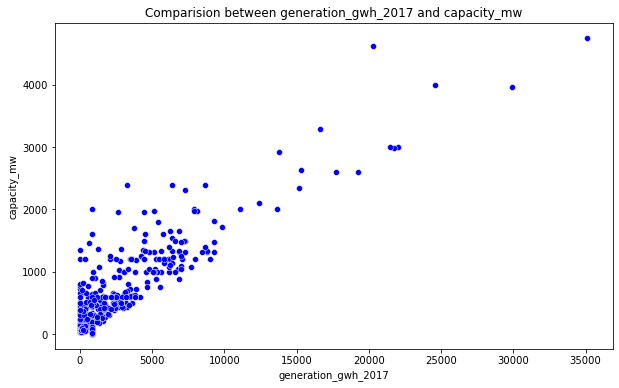

In [41]:
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2017 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2017", y = "capacity_mw", data = df,color="b")
plt.show()

We can see a linear relationship between the Generartion_gwh_2015 and capacity_mw. Here the electricity generation reported for the year 2017 has capacity above 10,000W. As the generation growth increases, the capacity of plant also increases.

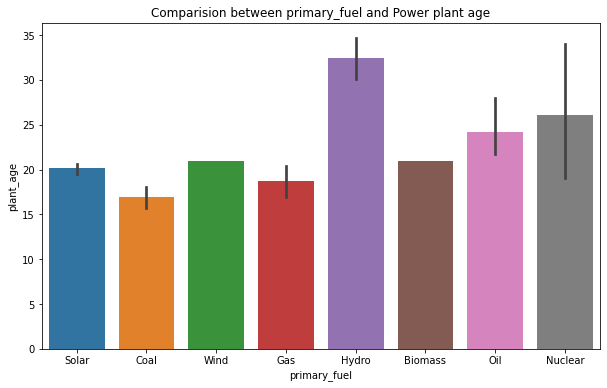

In [42]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age")
sns.barplot(x = "primary_fuel", y = "plant_age", data = df)
plt.show()

From the plot we can observe the following:
1. Most of old power plants uses Hydro energy to generate the electricity followed by nuclear and oil.
2. The power plants which are recently not very old use coal, solar or gas to generate Power.

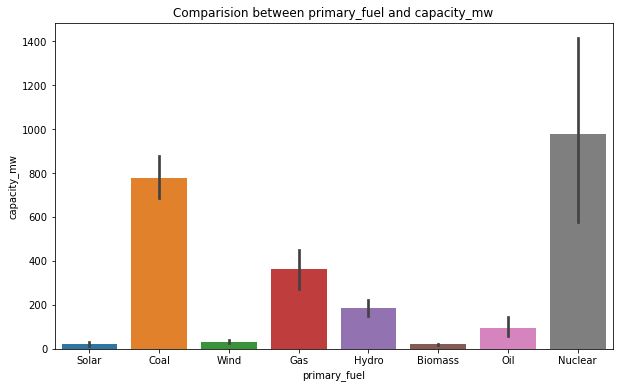

In [43]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

From the above, we can observe:
1. The plot shows that the capacity of generating electricity is high by nuclear plants followed by coal plants.
2. Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants.

# Multivariate Analysis

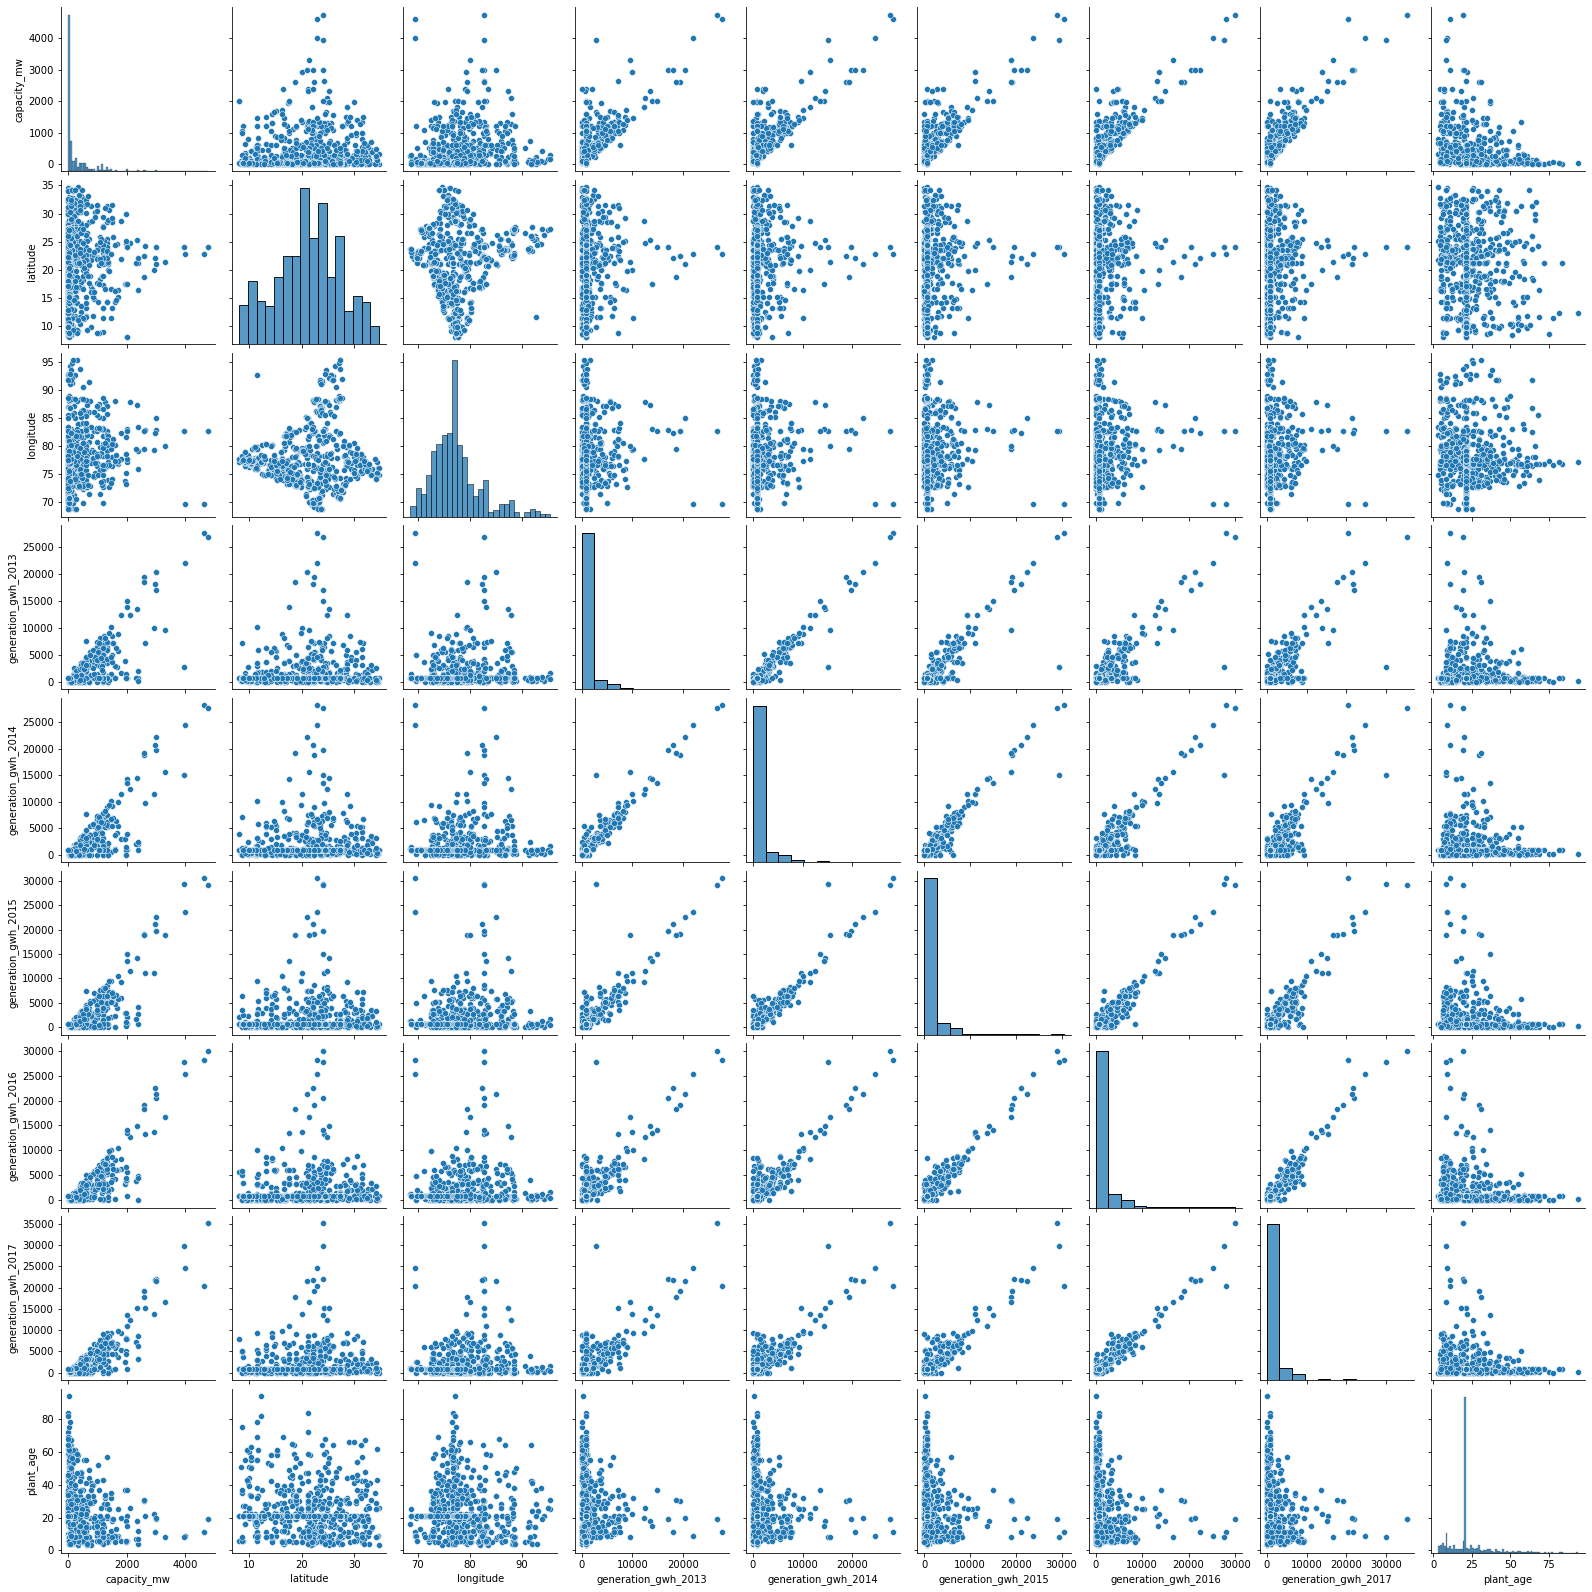

In [44]:
sns.pairplot(df)

# Checking Outliers

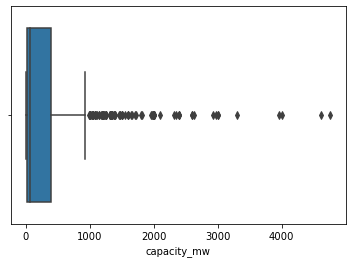

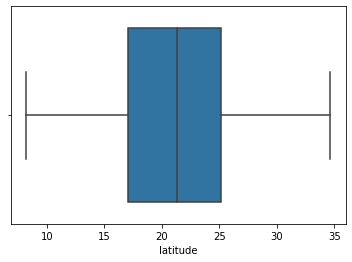

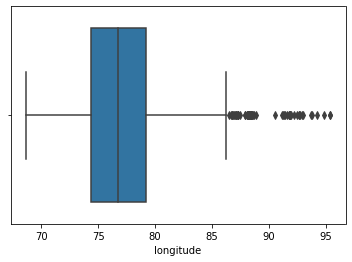

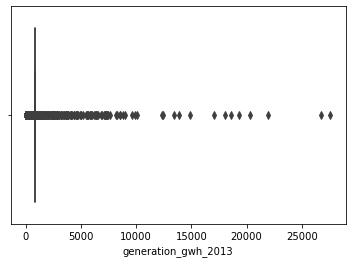

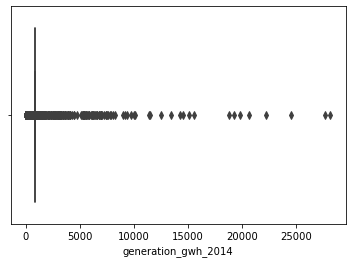

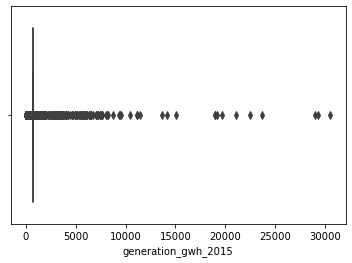

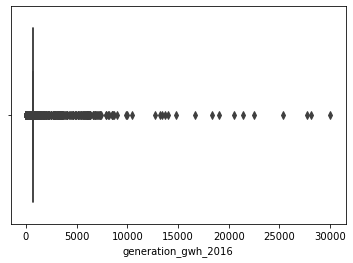

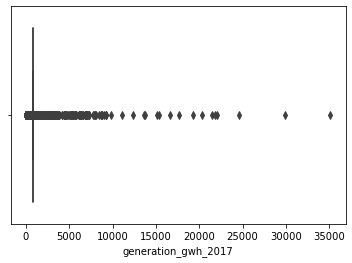

In [45]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

The features 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
'generation_gwh_2017', 'Power_plant_age' have outliers.

In [46]:
features = df[['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','plant_age']]

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(features))
z

array([[0.87220856, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.97991772],
       [0.58602743, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [1.68109953, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       ...,
       [0.38271188, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.76616907, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.01377542, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747]])

In [48]:
new_df = df[(z<3).all(axis=1)]
new_df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,10.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,21.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,21.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.74700,886.004428,663.774500,17.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,6.0


In [49]:
df.shape, new_df.shape

((908, 13), (852, 13))

In [50]:
data_loss = (908-852)/908*100
data_loss

6.167400881057269

We have lost 6.16% data(56 rows of data) after removing outliers

# Label Encoding

In [51]:
categorical_col = ['primary_fuel','other_fuel1','source','geolocation_source']

In [52]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_df[categorical_col] = new_df[categorical_col].apply(lbl.fit_transform)
new_df[categorical_col].head()

,primary_fuel,other_fuel1,source,geolocation_source
0,6,0,109,0
1,1,0,174,0
2,7,0,21,0
3,2,0,22,0
4,1,0,22,0


# Correlation

In [53]:
corr = new_df.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
capacity_mw,1.000000,0.047883,0.269970,-0.398618,NaN,-0.277952,NaN,0.575972,0.627406,0.685477,0.761222,0.800618,-0.248690
latitude,0.047883,1.000000,-0.025155,-0.006130,NaN,0.068515,NaN,0.074709,0.082205,0.071786,0.057760,0.070934,-0.084720
longitude,0.269970,-0.025155,1.000000,-0.388568,NaN,-0.234616,NaN,0.122737,0.126913,0.163771,0.207339,0.209047,-0.107977
primary_fuel,-0.398618,-0.006130,-0.388568,1.000000,NaN,0.039078,NaN,-0.232343,-0.250540,-0.277754,-0.290226,-0.291655,0.087476
other_fuel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,-0.277952,0.068515,-0.234616,0.039078,NaN,1.000000,NaN,-0.135116,-0.141641,-0.157690,-0.161786,-0.158162,-0.056455
geolocation_source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.575972,0.074709,0.122737,-0.232343,NaN,-0.135116,NaN,1.000000,0.944730,0.845955,0.730317,0.660801,-0.012797
generation_gwh_2014,0.627406,0.082205,0.126913,-0.250540,NaN,-0.141641,NaN,0.944730,1.000000,0.911892,0.800808,0.742744,-0.069265
generation_gwh_2015,0.685477,0.071786,0.163771,-0.277754,NaN,-0.157690,NaN,0.845955,0.911892,1.000000,0.907462,0.826148,-0.141499


<AxesSubplot:>

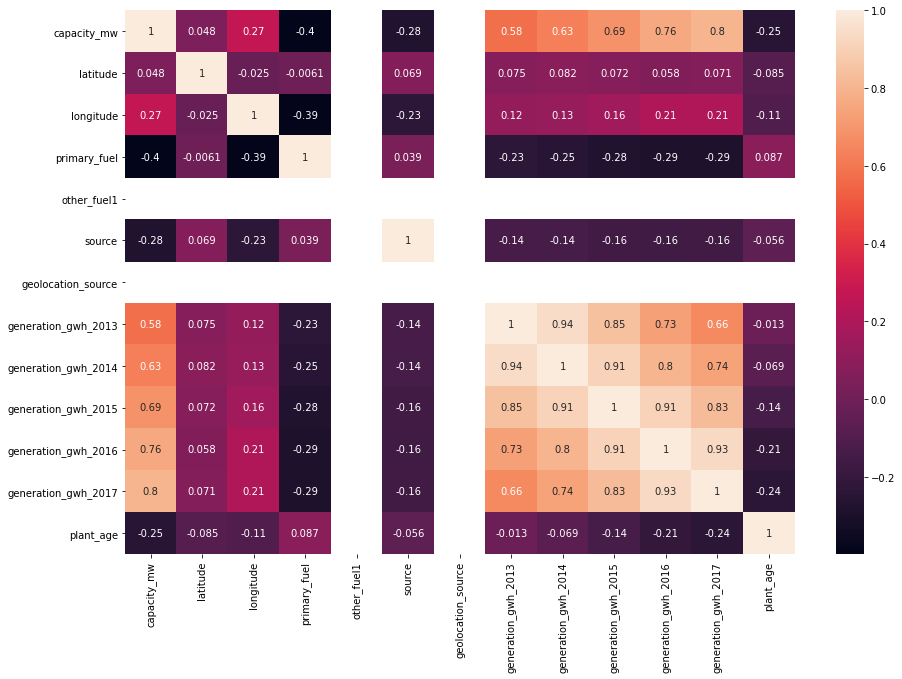

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

We can see the following from the above heatmap:
1. generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 are highly correlated with each other.
2. generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 have the negative correlation with plant_age.
3. The columns other_fuel1 and geolocation_source doesn't have any correlation with the target nor the other features.

In [55]:
new_df.drop(columns=['other_fuel1','geolocation_source'],axis=1,inplace=True)

In [56]:
new_df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
0,2.5,28.1839,73.2407,6,109,797.063475,805.760000,701.02725,716.728350,807.601700,10.0
1,98.0,24.7663,74.6090,1,174,797.063475,805.760000,701.02725,716.728350,807.601700,21.0
2,39.2,21.9038,69.3732,7,21,797.063475,805.760000,701.02725,716.728350,807.601700,21.0
3,135.0,23.8712,91.3602,2,22,631.777928,617.789264,843.74700,886.004428,663.774500,17.0
4,1800.0,21.9603,82.4091,1,22,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,6.0


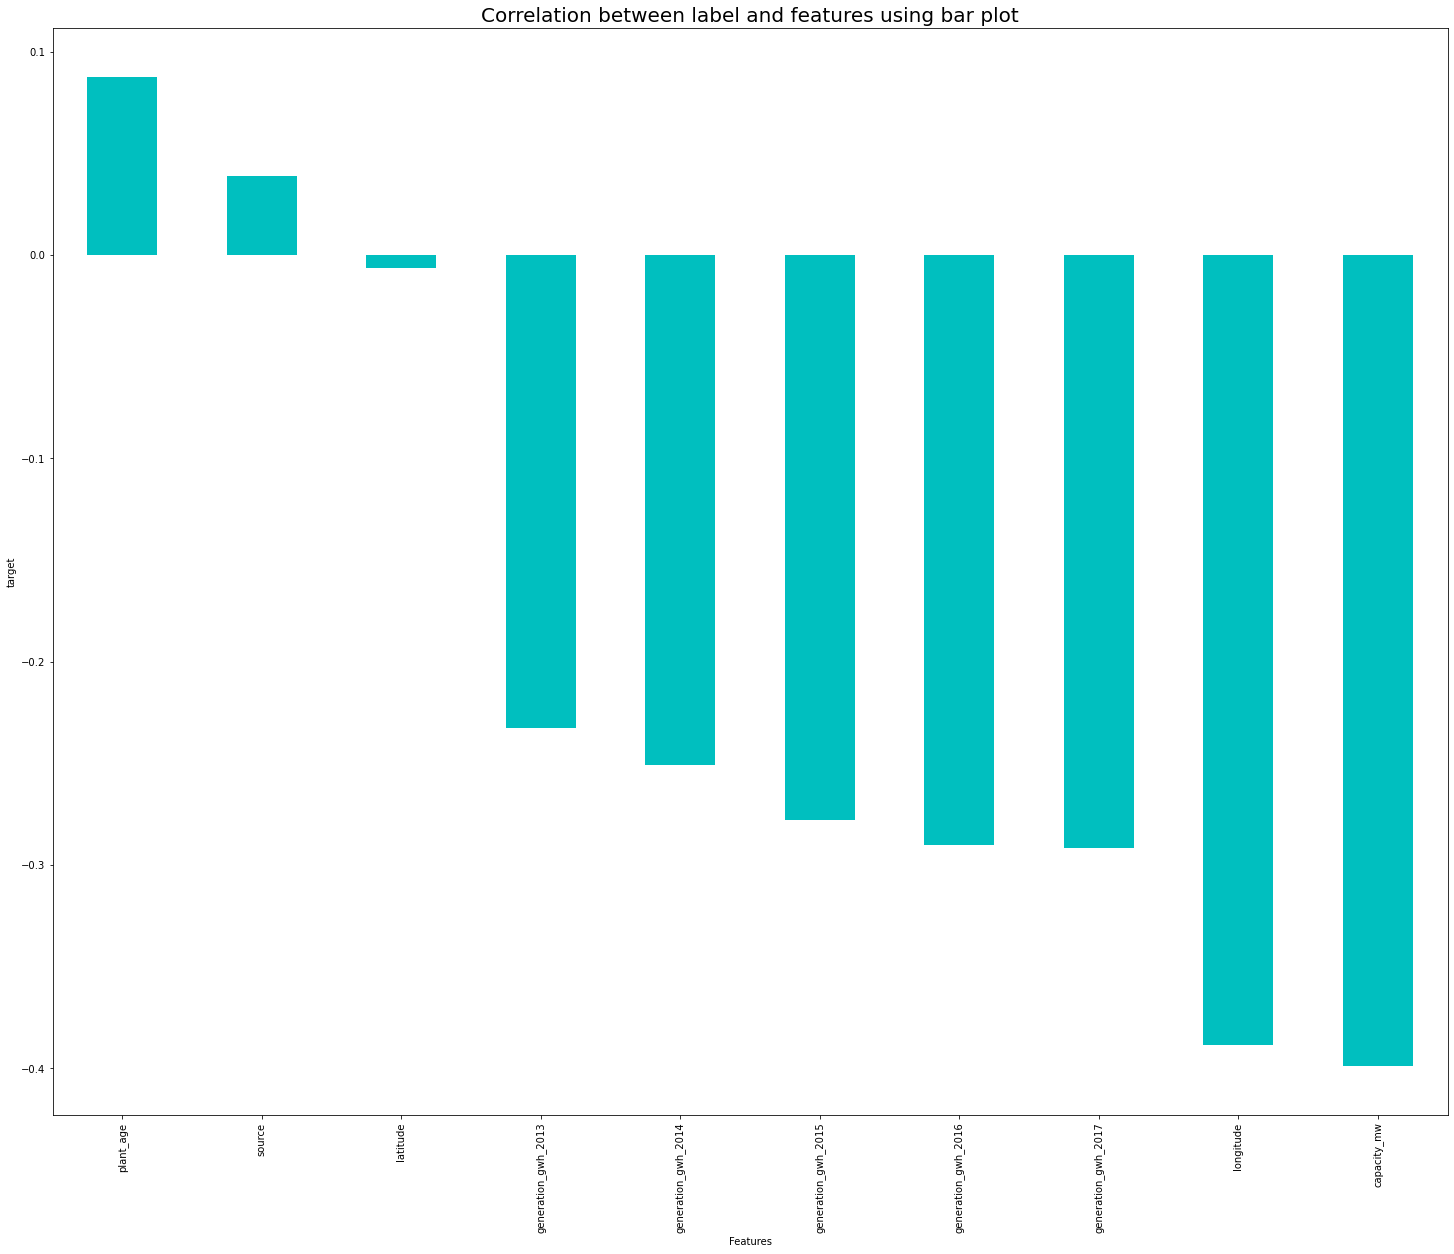

In [57]:
plt.figure(figsize=(25,20))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between label and features using bar plot',fontsize=20)
plt.show()

The feature latitude has the least correlation with the target, so let us drop it.

In [58]:
new_df.drop(columns=['latitude'],axis=1,inplace=True)

In [59]:
new_df.head()

,capacity_mw,longitude,primary_fuel,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
0,2.5,73.2407,6,109,797.063475,805.760000,701.02725,716.728350,807.601700,10.0
1,98.0,74.6090,1,174,797.063475,805.760000,701.02725,716.728350,807.601700,21.0
2,39.2,69.3732,7,21,797.063475,805.760000,701.02725,716.728350,807.601700,21.0
3,135.0,91.3602,2,22,631.777928,617.789264,843.74700,886.004428,663.774500,17.0
4,1800.0,82.4091,1,22,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,6.0


# 1. Prediction for capacity_mw

Let's seperate the target and features

In [60]:
x = new_df.drop("capacity_mw",axis=1)
y = new_df['capacity_mw']

In [61]:
x.shape, y.shape

((852, 9), (852,))

In [62]:
x.skew()

longitude              0.888694
primary_fuel           0.413982
source                 1.736117
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
plant_age              1.209638
dtype: float64

We can see that most of the features have skewness. Let us remove the skew using 'yeo-johnson' method. We do not remove skew from the feature 'source' because it is a categorical feature.

In [63]:
skew_features = ['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','plant_age']
from sklearn.preprocessing import PowerTransformer
scalar = PowerTransformer(method='yeo-johnson')
x[skew_features] = scalar.fit_transform(x[skew_features].values)
x[skew_features].head()

,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
0,-0.924039,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220
1,-0.500630,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
2,-2.373612,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
3,2.492970,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572
4,1.285220,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528


In [64]:
x.skew()

longitude              0.000077
primary_fuel           0.413982
source                 1.736117
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125694
plant_age              0.026590
dtype: float64

We have removed the skew from the data

Let us see how the distribution of data looks.

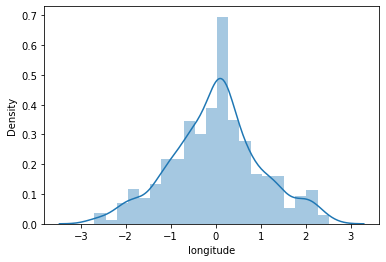

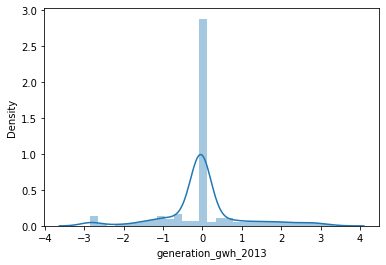

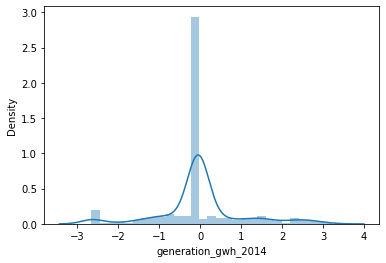

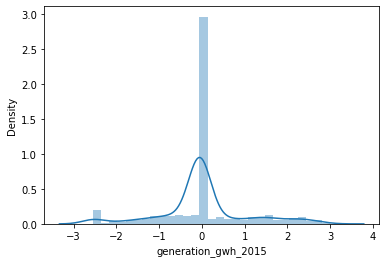

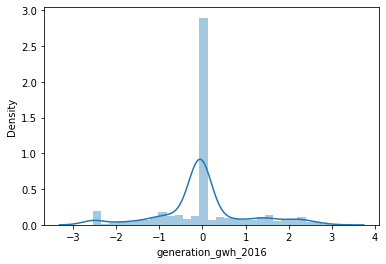

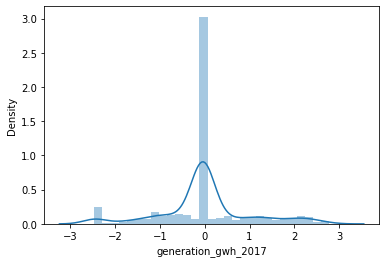

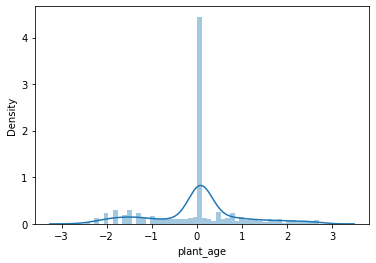

In [65]:
for i in x[skew_features]:
    sns.distplot(x[i])
    plt.show()

We can see that the data is now normally distributed.

# Standard Scalar

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
0,-0.924039,1.175664,1.399156,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220
1,-0.500630,-0.973833,2.823623,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
2,-2.373612,1.605563,-0.529352,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
3,2.492970,-0.543934,-0.507437,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572
4,1.285220,-0.973833,-0.507437,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528
...,...,...,...,...,...,...,...,...,...
847,0.237064,-0.973833,-0.507437,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887
848,0.429134,1.175664,0.697881,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
849,-0.223563,1.605563,-0.529352,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
850,-0.762359,-0.973833,0.303413,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760


Since multiple columns had high correlation with each other, let us check for multicollinearity

# Multicollinearity

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.313139,longitude
1,1.254635,primary_fuel
2,1.066762,source
3,5.459220,generation_gwh_2013
4,7.210458,generation_gwh_2014
5,6.174370,generation_gwh_2015
6,9.650779,generation_gwh_2016
7,5.196524,generation_gwh_2017
8,1.126098,plant_age


There is no mulitcollinearity problem, let us proceed to model building.

# Model Building

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Best Random State

In [69]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.8557724964523972 at Random_state 7


In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=maxRS)

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Random Forest Regressor

In [72]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predRFR = rfr.predict(x_test)
print("R2_Score:",r2_score(y_test,predRFR))

R2_Score: 0.8513421859581038


# Decision Tree Regressor

In [73]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predDTR = dtr.predict(x_test)
print("R2_Score Decision Tree Regressor:",r2_score(y_test,predDTR))

R2_Score Decision Tree Regressor: 0.6488574706156343


# KNN Regressor

In [74]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("R2_Score using KNN Regressor:",r2_score(y_test,predknn))

R2_Score using KNN Regressor: 0.8024851087922193


# Gradient Boosting Regrssor

In [75]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predGBR = gbr.predict(x_test)
print("R2_Score using Gradient Boosting Regressor:",r2_score(y_test,predGBR))

R2_Score using Gradient Boosting Regressor: 0.8090495064109058


# AdaBoost Regressor

In [76]:
abr = AdaBoostRegressor()
abr.fit(x_test,y_test)
predABR = abr.predict(x_test)
print("R2_Score using AdaBoost Regressor:",r2_score(y_test,predABR))

R2_Score using AdaBoost Regressor: 0.8532593518059717


# Cross Validation Score

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
print("Cross_Validation_Score using Random Forest Regressor:",cross_val_score(rfr,x,y,cv=5).mean())

Cross_Validation_Score using Random Forest Regressor: 0.7711976752922809


In [79]:
print("Cross_Validation_Score using Decision Tree Regressor:",cross_val_score(dtr,x,y,cv=5).mean())

Cross_Validation_Score using Decision Tree Regressor: 0.5740421400173414


In [80]:
print("Cross_Validation_Score using KNN Regressor",cross_val_score(knn,x,y,cv=5).mean())

Cross_Validation_Score using KNN Regressor 0.7422903147189474


In [81]:
print("Cross_Validation_Score using Gradient Boosting Regressor:",cross_val_score(gbr,x,y,cv=5).mean())

Cross_Validation_Score using Gradient Boosting Regressor: 0.7620846595231794


In [82]:
print("Cross_Validation_Score using Ada Boost Regressor:",cross_val_score(abr,x,y,cv=5).mean())

Cross_Validation_Score using Ada Boost Regressor: 0.5457592437586127


#### Random Forest Regressor is the best model.

# Hyperparameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [98]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [99]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [100]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [101]:
capacity = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train, y_train)
pred = capacity.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 87.14468662698877


### We get an Accuracy of 85.71% after Hyperparameter Tuning

# Saving the Model

In [102]:
import pickle
filename = 'power_plant.pkl'
pickle.dump(rfr, open(filename, 'wb'))

# Prediction Results of capacity_mw

In [103]:
a = np.array(y_test)
predicted = np.array(rfr.predict(x_test))
df_pred= pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))
df_pred.head()

,Original,Predicted
0,26.000,22.26610
1,15.000,59.83700
2,18.000,19.36200
3,431.586,291.22248
4,186.200,305.25136


# 2. Prediction for primary_fuel

In [104]:
x_df = new_df.drop("primary_fuel",axis=1)
y_df = new_df["primary_fuel"]

In [105]:
x_df.shape, y_df.shape

((852, 9), (852,))

# Checking Skewness

In [106]:
x_df.skew()

capacity_mw            2.134177
longitude              0.888694
source                 1.736117
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
plant_age              1.209638
dtype: float64

We can see that all the columns have skew data. Let us remove the skew using yeo-johnson method

In [107]:
skew = ['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015',
        'generation_gwh_2016','generation_gwh_2017','plant_age']
from sklearn.preprocessing import PowerTransformer

In [108]:
scaler = PowerTransformer(method='yeo-johnson')
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df.head()

,capacity_mw,longitude,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
0,-1.675434,-0.924039,109,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220
1,0.214717,-0.500630,174,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
2,-0.280583,-2.373612,21,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
3,0.386767,2.492970,22,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572
4,1.740344,1.285220,22,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528


In [109]:
x_df.skew()

capacity_mw            0.013903
longitude              0.000077
source                 1.736117
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125694
plant_age              0.026590
dtype: float64

We have removed the skew from all the columns except source because it is a categorical feature.

# Outliers

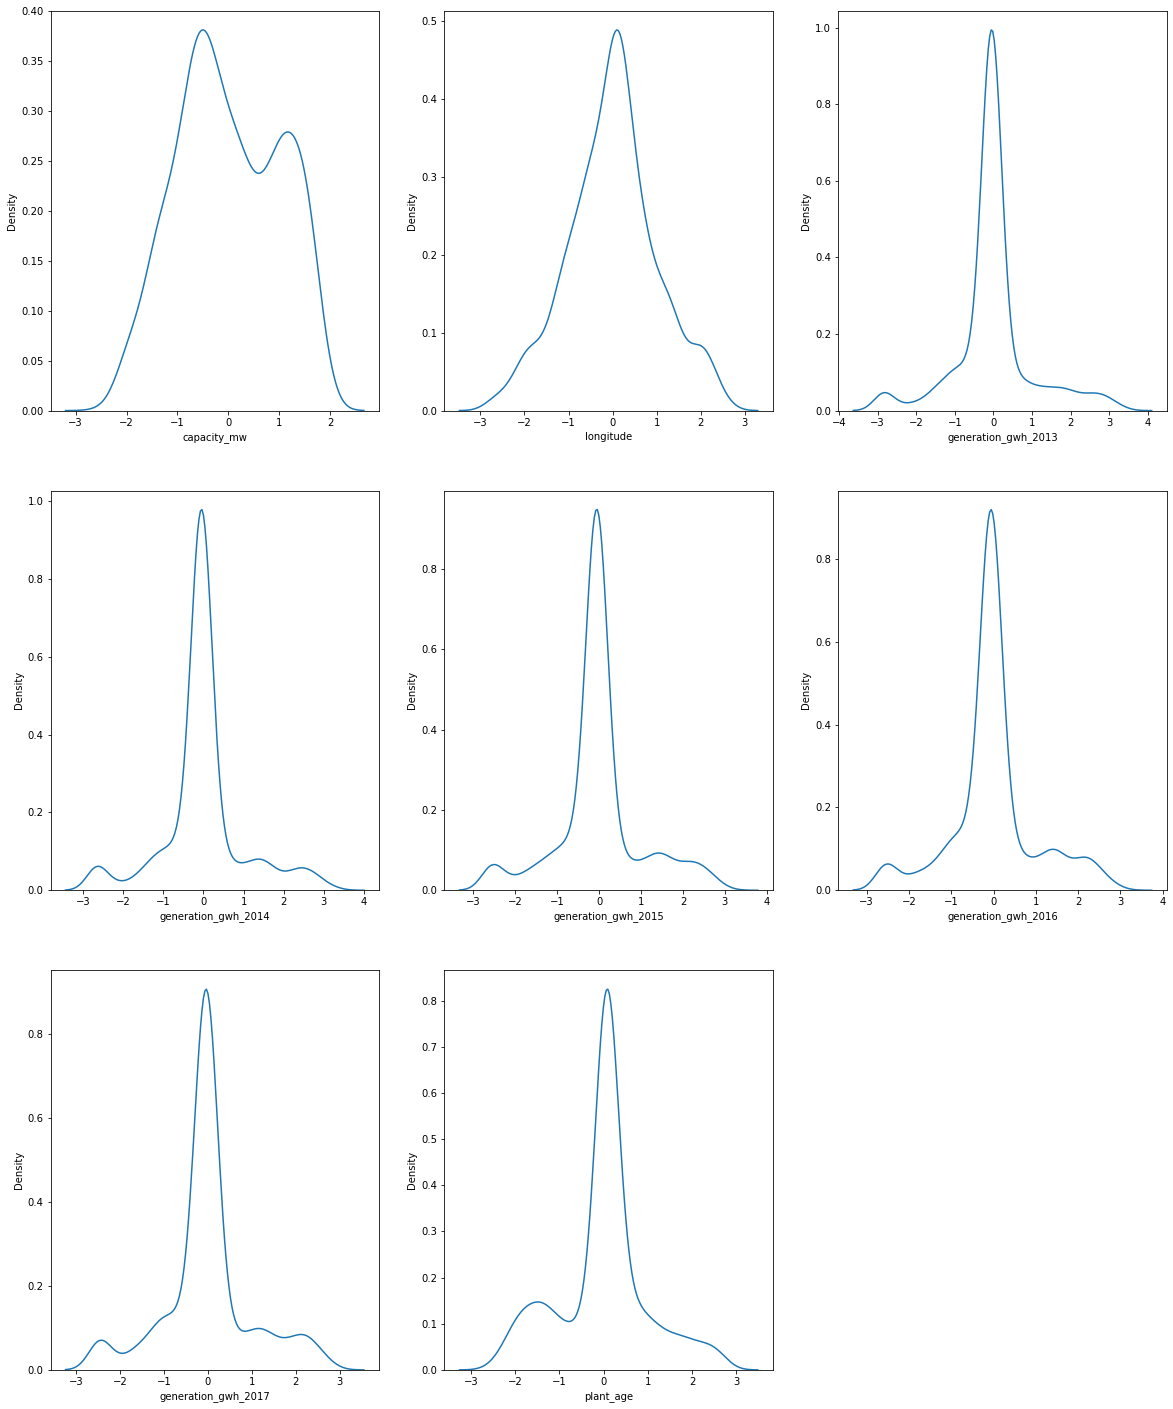

In [111]:
plt.figure(figsize=(20,25))
plotnumber = 1

for i in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[i],hist=False)
    plotnumber+=1
plt.show()

# Standard Scaler

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df),columns = x_df.columns)
x_df

,capacity_mw,longitude,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
0,-1.675434,-0.924039,1.399156,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220
1,0.214717,-0.500630,2.823623,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
2,-0.280583,-2.373612,-0.529352,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
3,0.386767,2.492970,-0.507437,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572
4,1.740344,1.285220,-0.507437,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528
...,...,...,...,...,...,...,...,...,...
847,1.680420,0.237064,-0.507437,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887
848,-1.597071,0.429134,0.697881,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
849,-0.513131,-0.223563,-0.529352,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
850,0.105331,-0.762359,0.303413,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760


In [113]:
y_df.value_counts()

1    240
3    218
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

Let us use SMOTE() and Oversample the data

# Oversampling

In [114]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df,y_df = SM.fit_resample(x_df,y_df)

In [115]:
y_df.value_counts()

7    240
6    240
5    240
4    240
3    240
2    240
1    240
0    240
Name: primary_fuel, dtype: int64

# Model Building

### Finding Best Random State

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = TTS(x_df,y_df,test_size=.30,random_state=i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_df_train,y_df_train)
    pred = dtc.predict(x_df_test)
    acc = accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.8819444444444444 at random_state 49


In [117]:
 x_df_train,x_df_test,y_df_train,y_df_test = TTS(x_df,y_df,test_size=.30,random_state=maxRS)

In [118]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

# Decision Tree Classifier

In [119]:
dtc = DecisionTreeClassifier()
dtc.fit(x_df_train,y_df_train)
predDTC = dtc.predict(x_df_test)
print(accuracy_score(y_df_test,predDTC))
print(classification_report(y_df_test,predDTC))
print(confusion_matrix(y_df_test,predDTC))

0.8732638888888888
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        70
           1       0.73      0.55      0.63        66
           2       0.73      0.84      0.78        63
           3       0.77      0.81      0.79        69
           4       0.93      0.95      0.94        85
           5       0.88      0.91      0.89        74
           6       0.91      0.92      0.91        63
           7       1.00      0.99      0.99        86

    accuracy                           0.87       576
   macro avg       0.86      0.87      0.86       576
weighted avg       0.87      0.87      0.87       576

[[67  1  1  0  0  0  1  0]
 [ 1 36  6 13  5  2  3  0]
 [ 0  2 53  4  0  4  0  0]
 [ 0  4  5 56  1  3  0  0]
 [ 0  4  0  0 81  0  0  0]
 [ 0  1  5  0  0 67  1  0]
 [ 1  1  3  0  0  0 58  0]
 [ 0  0  0  0  0  0  1 85]]


We get Accuracy of 88% using Decision Tree Classifier

# RandomForestClassifier

In [120]:
rfc = RandomForestClassifier()
rfc.fit(x_df_train,y_df_train)
predRFC = rfc.predict(x_df_test)
print(accuracy_score(y_df_test,predRFC))
print(confusion_matrix(y_df_test,predRFC))
print(classification_report(y_df_test,predRFC))

0.9097222222222222
[[68  1  0  0  0  0  1  0]
 [ 1 44  7  7  3  2  2  0]
 [ 0  2 57  0  0  4  0  0]
 [ 0  4  4 57  2  2  0  0]
 [ 0  1  0  0 84  0  0  0]
 [ 1  1  0  0  0 72  0  0]
 [ 4  0  2  0  0  1 56  0]
 [ 0  0  0  0  0  0  0 86]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        70
           1       0.83      0.67      0.74        66
           2       0.81      0.90      0.86        63
           3       0.89      0.83      0.86        69
           4       0.94      0.99      0.97        85
           5       0.89      0.97      0.93        74
           6       0.95      0.89      0.92        63
           7       1.00      1.00      1.00        86

    accuracy                           0.91       576
   macro avg       0.90      0.90      0.90       576
weighted avg       0.91      0.91      0.91       576



We get accuracy score of 93% using Random Forest Classifier

# Support Vector Classifier

In [121]:
svc = SVC()
svc.fit(x_df_train,y_df_train)
predsvc = svc.predict(x_df_test)
print(accuracy_score(y_df_test,predsvc))
print(confusion_matrix(y_df_test,predsvc))
print(classification_report(y_df_test,predsvc))

0.7690972222222222
[[60  0  0  0  0  1  0  9]
 [ 7 27 15  4  7  2  0  4]
 [ 0  2 46  2  3  8  0  2]
 [ 0  8  9 37  2  2  0 11]
 [ 0  0  0  0 85  0  0  0]
 [ 5  3  0  0  0 61  0  5]
 [11  0  0  0  0  5 43  4]
 [ 0  0  2  0  0  0  0 84]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        70
           1       0.68      0.41      0.51        66
           2       0.64      0.73      0.68        63
           3       0.86      0.54      0.66        69
           4       0.88      1.00      0.93        85
           5       0.77      0.82      0.80        74
           6       1.00      0.68      0.81        63
           7       0.71      0.98      0.82        86

    accuracy                           0.77       576
   macro avg       0.78      0.75      0.75       576
weighted avg       0.78      0.77      0.76       576



We get accuracy of 76% using Support Vector Classifier

# KNN Classifier

In [122]:
knn = KNN()
knn.fit(x_df_train,y_df_train)
predknn = knn.predict(x_df_test)
print(accuracy_score(y_df_test,predknn))
print(confusion_matrix(y_df_test,predknn))
print(classification_report(y_df_test,predknn))

0.8263888888888888
[[65  1  0  0  0  1  0  3]
 [ 3 31 11  5  8  4  1  3]
 [ 0  4 49  3  0  7  0  0]
 [ 0  5  8 44  2  2  0  8]
 [ 0  0  1  0 84  0  0  0]
 [ 1  1  0  0  0 71  0  1]
 [ 4  0  1  0  0  7 50  1]
 [ 0  0  0  2  0  1  1 82]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        70
           1       0.74      0.47      0.57        66
           2       0.70      0.78      0.74        63
           3       0.81      0.64      0.72        69
           4       0.89      0.99      0.94        85
           5       0.76      0.96      0.85        74
           6       0.96      0.79      0.87        63
           7       0.84      0.95      0.89        86

    accuracy                           0.83       576
   macro avg       0.82      0.81      0.81       576
weighted avg       0.83      0.83      0.82       576



We get accuracy of 82.9% using KNN Classifier

# Gradient Boosting Classifier

In [123]:
gb = GradientBoostingClassifier()
gb.fit(x_df_train,y_df_train)
predGB = gb.predict(x_df_test)
print(accuracy_score(y_df_test,predGB))
print(confusion_matrix(y_df_test,predGB))
print(classification_report(y_df_test,predGB))

0.8975694444444444
[[65  4  0  0  0  0  1  0]
 [ 1 44  6  8  4  2  1  0]
 [ 0  0 60  1  0  2  0  0]
 [ 0  5  5 55  2  2  0  0]
 [ 0  1  0  0 84  0  0  0]
 [ 0  4  1  0  0 69  0  0]
 [ 3  5  0  0  0  1 54  0]
 [ 0  0  0  0  0  0  0 86]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        70
           1       0.70      0.67      0.68        66
           2       0.83      0.95      0.89        63
           3       0.86      0.80      0.83        69
           4       0.93      0.99      0.96        85
           5       0.91      0.93      0.92        74
           6       0.96      0.86      0.91        63
           7       1.00      1.00      1.00        86

    accuracy                           0.90       576
   macro avg       0.89      0.89      0.89       576
weighted avg       0.90      0.90      0.90       576



We get accuracy of 89% using Gradient Bosting Classifier

# Cross Validation Score

In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
print("Cross_Validation_Score using Random Forest Classifier:",cross_val_score(rfc,x_df,y_df,cv=5).mean())

Cross_Validation_Score using Random Forest Classifier: 0.8963541666666668


In [126]:
print("Cross_Validation_Score using Decision Tree Classifier:",cross_val_score(dtc,x_df,y_df,cv=5).mean())

Cross_Validation_Score using Decision Tree Classifier: 0.8390625


In [127]:
print("Cross_Validation_Score using KNN Classifier",cross_val_score(knn,x_df,y_df,cv=5).mean())

Cross_Validation_Score using KNN Classifier 0.8208333333333334


In [128]:
print("Cross_Validation_Score using Support Vector Regressor",cross_val_score(svc,x_df,y_df,cv=5).mean())

Cross_Validation_Score using Support Vector Regressor 0.7682291666666667


In [129]:
print("Cross_Validation_Score using Gradient Boosting Regressor",cross_val_score(gb,x_df,y_df,cv=5).mean())

Cross_Validation_Score using Gradient Boosting Regressor 0.8854166666666666


As we can see The cross validation score of Random Forest Classifier is greater than the Accuracy Score, which is overfitting.

### Best Model - Gradient Boosting Classifier

# Hyperparameter Tuning

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
parameters = {'criterion':['friedman_mse','mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [132]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [133]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [134]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [135]:
primary_fuel = GradientBoostingClassifier (criterion='mae', max_depth=8, max_features='log2', n_estimators=200)
primary_fuel.fit(x_df_train, y_df_train)
pred = primary_fuel.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

91.49305555555556


We get accuracy of 91.49% after Hyperparameter tuning

# Saving the Model

In [138]:
import pickle
filename = 'primary_fuel.pkl'
pickle.dump(gb, open(filename, 'wb'))

# Prediction Results

In [143]:
import numpy as np
a = np.array(y_df_test)
predicted = np.array(gb.predict(x_df_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,5,5
1,6,0
2,4,4
3,0,0
4,4,4
...,...,...
571,5,5
572,3,3
573,7,7
574,0,6
